In [3]:
pip install opencv-python matplotlib

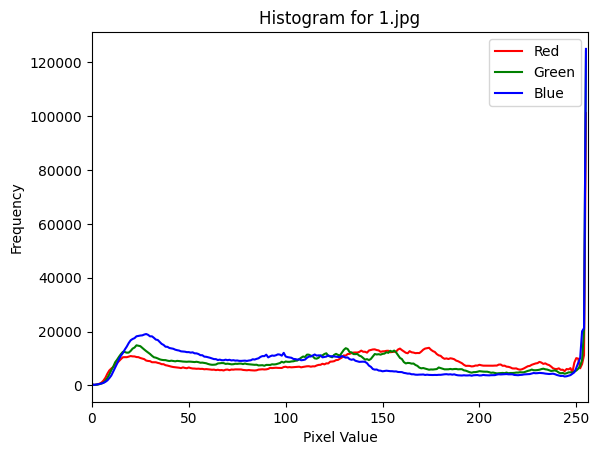

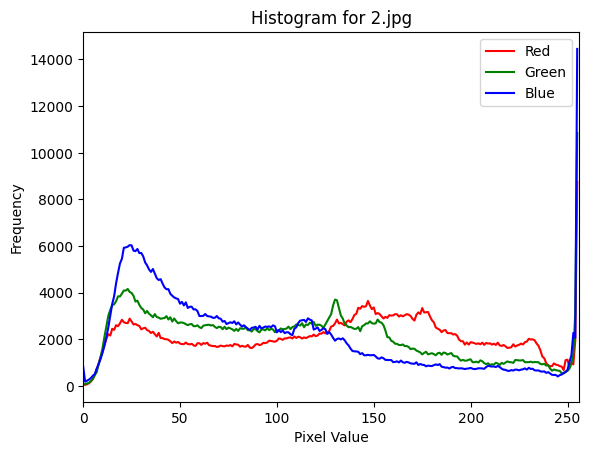

In [7]:
import cv2
import matplotlib.pyplot as plt

# Sample list of image file paths. Replace this with your list.
image_file_paths = ["1.jpg", "2.jpg"]

for image_path in image_file_paths:
    # Read the image in color mode (default mode)
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Convert the image from BGR to RGB (OpenCV loads images in BGR by default)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Set up the plot with subplots for each color channel
    plt.figure()
    plt.title(f"Histogram for {image_path}")

    colors = ('r', 'g', 'b')
    for i, col in enumerate(colors):
        # Calculate the histogram for current channel
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])

        # Plot the histogram
        plt.plot(hist, color=col)
        plt.xlim([0, 256])

    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.legend(['Red', 'Green', 'Blue'])
    plt.show()



In [8]:
import cv2
import numpy as np
from scipy.stats import ks_2samp, entropy

def KL_divergence(p, q):
    return entropy(p, q)

def JS_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * KL_divergence(p, m) + 0.5 * KL_divergence(q, m)

# Load images and convert to grayscale
img1 = cv2.imread("1.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("2.jpg", cv2.IMREAD_GRAYSCALE)

# Compute histograms and normalize
hist1 = cv2.calcHist([img1], [0], None, [256], [0, 256]).ravel()
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256]).ravel()
hist1 /= hist1.sum()
hist2 /= hist2.sum()

# Apply tests
ks_statistic, ks_pvalue = ks_2samp(hist1, hist2)
kl_div = KL_divergence(hist1, hist2)
js_div = JS_divergence(hist1, hist2)

print("Kolmogorov-Smirnov statistic:", ks_statistic)
print("KL Divergence:", kl_div)
print("JS Divergence:", js_div)



Kolmogorov-Smirnov statistic: 0.28125
KL Divergence: 0.040004358
JS Divergence: 0.008923010900616646


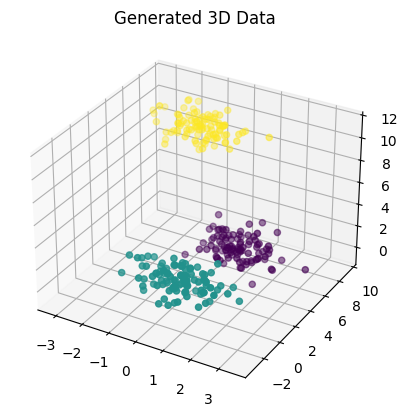

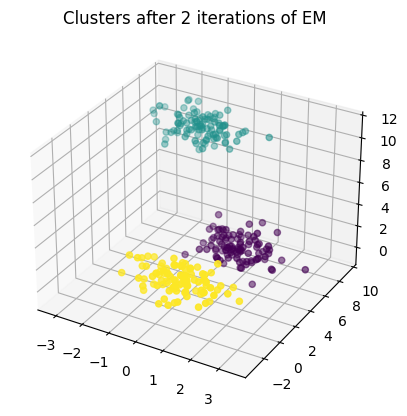

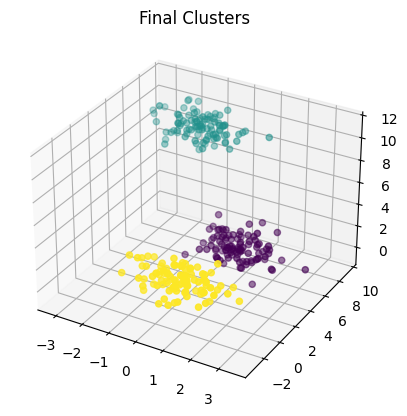

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D

# (1) Create a random dataset in 3D space with three clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.80, random_state=0, n_features=3)

# Visualize the generated data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_title("Generated 3D Data")
plt.show()

# (2) Using EM to implement GMM clustering
gmm = GaussianMixture(n_components=3, max_iter=2, random_state=0)  # Set maximum iteration to 2 for demonstration
gmm.fit(X)

# (3) Visualize after 2 iterations (E and M steps)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=gmm.predict(X))
ax.set_title("Clusters after 2 iterations of EM")
plt.show()

# Running the GMM to completion
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)

# Visualize the final clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=gmm.predict(X))
ax.set_title("Final Clusters")
plt.show()
